# Fashion MNIST Data Classification Project

# Step 1) Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

# Step 2) Load data

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
# Print the shape of data

In [4]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
# show image

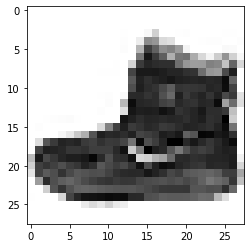

In [10]:
plt.imshow(X_train[0],cmap='Greys')

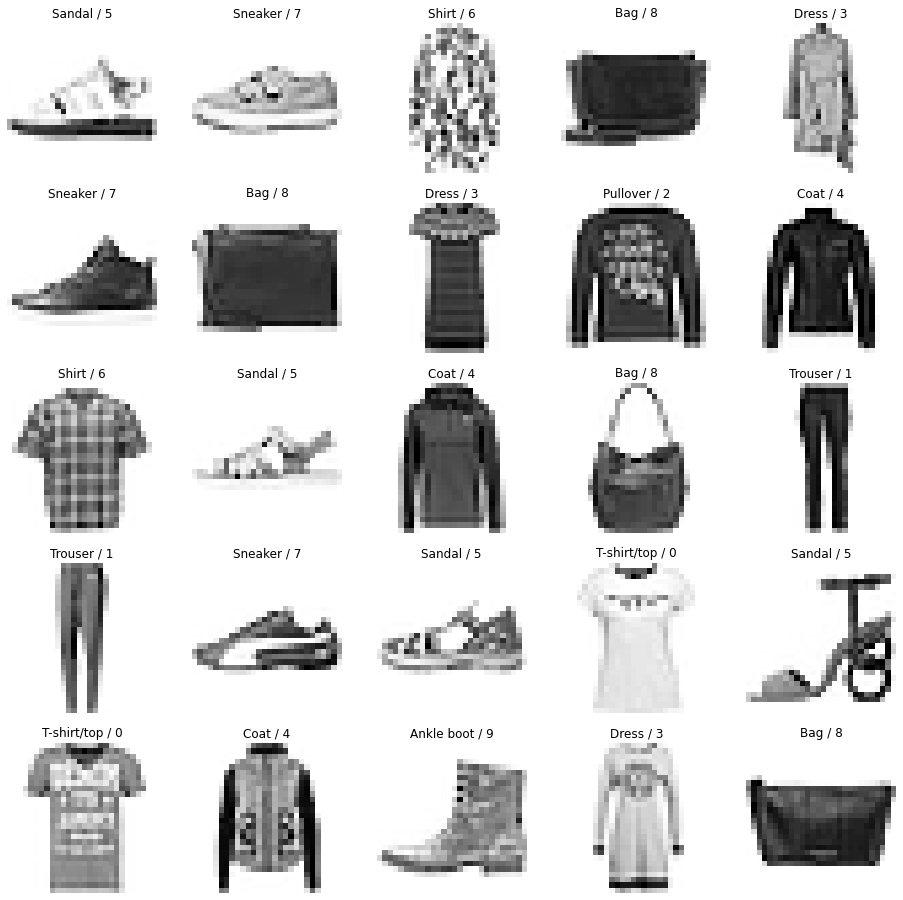

In [11]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train.ndim

3

In [13]:
X_train = np.expand_dims(X_train,-1)

In [14]:
X_train.ndim

4

In [15]:
X_test=np.expand_dims(X_test,-1)

In [16]:
# feature scaling

In [17]:
X_train = X_train/255
X_test= X_test/255

In [18]:
# Split dataset

In [19]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [20]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Step 3) Buiding the CNN model

In [21]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 11s 114ms/step - loss: 0.6399 - accuracy: 0.7788 - val_loss: 0.4460 - val_accuracy: 0.8418
Epoch 2/10
94/94 [==============================] - 10s 111ms/step - loss: 0.3905 - accuracy: 0.8640 - val_loss: 0.3667 - val_accuracy: 0.8740
Epoch 3/10
94/94 [==============================] - 11s 112ms/step - loss: 0.3403 - accuracy: 0.8795 - val_loss: 0.3448 - val_accuracy: 0.8798
Epoch 4/10
94/94 [==============================] - 11s 112ms/step - loss: 0.3137 - accuracy: 0.8887 - val_loss: 0.3397 - val_accuracy: 0.8798
Epoch 5/10
94/94 [==============================] - 11s 114ms/step - loss: 0.2895 - accuracy: 0.8977 - val_loss: 0.3021 - val_accuracy: 0.8945
Epoch 6/10
94/94 [==============================] - 11s 114ms/step - loss: 0.2651 - accuracy: 0.9062 - val_loss: 0.3022 - val_accuracy: 0.8940
Epoch 7/10
94/94 [==============================] - 11s 113ms/step - loss: 0.2530 - accuracy: 0.9101 - val_loss: 0.2993 - val_accuracy: 0.8938

In [25]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.07, 0.03, 0.01]], dtype=float32)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.8978


[0.2805943489074707, 0.8978000283241272]

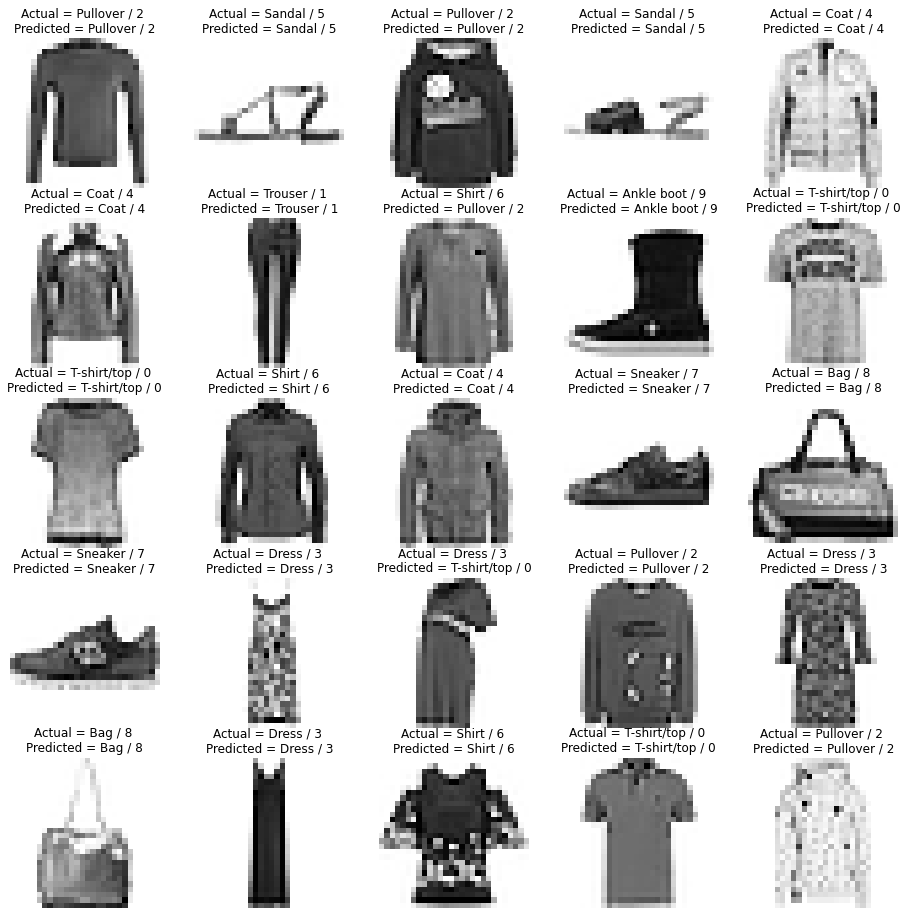

In [28]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

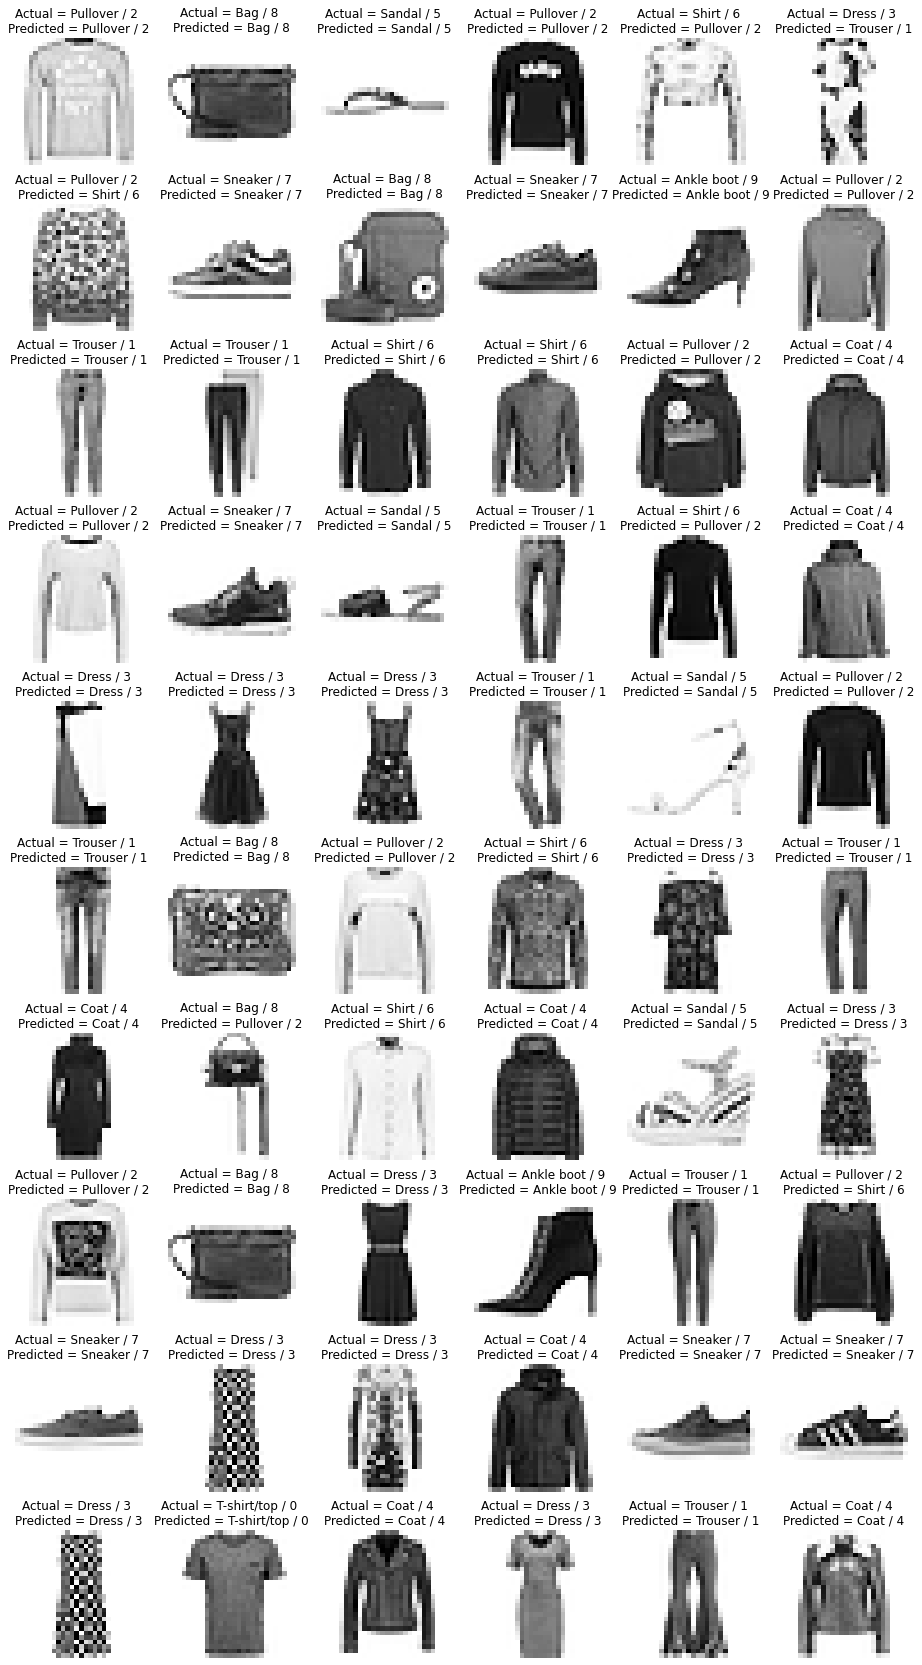

In [29]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [30]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.88      0.83      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.83      0.84      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.97      0.94      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



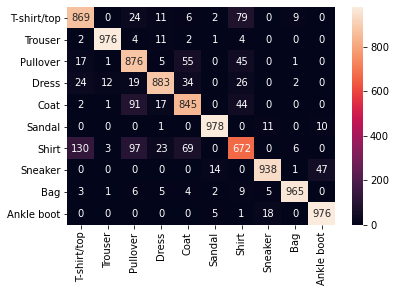

In [32]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [33]:
"""# Save Model"""

'# Save Model'

In [34]:

model.save('fashion_mnist_cnn_model.h5')

# Build 2 complex CNN

In [35]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 13s 131ms/step - loss: 1.0287 - accuracy: 0.6139 - val_loss: 0.6094 - val_accuracy: 0.7611
Epoch 2/20
94/94 [==============================] - 12s 132ms/step - loss: 0.5563 - accuracy: 0.7886 - val_loss: 0.4778 - val_accuracy: 0.8201
Epoch 3/20
94/94 [==============================] - 12s 133ms/step - loss: 0.4705 - accuracy: 0.8272 - val_loss: 0.4088 - val_accuracy: 0.8482
Epoch 4/20
94/94 [==============================] - 12s 132ms/step - loss: 0.4126 - accuracy: 0.8494 - val_loss: 0.3666 - val_accuracy: 0.8648
Epoch 5/20
94/94 [==============================] - 12s 132ms/step - loss: 0.3749 - accuracy: 0.8624 - val_loss: 0.3418 - val_accuracy: 0.8730
Epoch 6/20
94/94 [==============================] - 12s 132ms/step - loss: 0.3495 - accuracy: 0.8725 - val_loss: 0.3427 - val_accuracy: 0.8695
Epoch 7/20
94/94 [==============================] - 13s 134ms/step - loss: 0.3276 - accuracy: 0.8787 - val_loss: 0.3177 - val_accuracy: 0.8845

94/94 [==============================] - 32s 342ms/step - loss: 0.0803 - accuracy: 0.9716 - val_loss: 0.4451 - val_accuracy: 0.9045
Epoch 39/50
94/94 [==============================] - 32s 342ms/step - loss: 0.0769 - accuracy: 0.9734 - val_loss: 0.3881 - val_accuracy: 0.9078
Epoch 40/50
94/94 [==============================] - 32s 341ms/step - loss: 0.0720 - accuracy: 0.9752 - val_loss: 0.4644 - val_accuracy: 0.8957
Epoch 41/50
94/94 [==============================] - 32s 340ms/step - loss: 0.0694 - accuracy: 0.9755 - val_loss: 0.4788 - val_accuracy: 0.9037
Epoch 42/50
94/94 [==============================] - 32s 345ms/step - loss: 0.0647 - accuracy: 0.9768 - val_loss: 0.4575 - val_accuracy: 0.9035
Epoch 43/50
94/94 [==============================] - 32s 341ms/step - loss: 0.0777 - accuracy: 0.9729 - val_loss: 0.4121 - val_accuracy: 0.9073
Epoch 44/50
94/94 [==============================] - 33s 352ms/step - loss: 0.0599 - accuracy: 0.9792 - val_loss: 0.4730 - val_accuracy: 0.9020
Epoc

[0.48719334602355957, 0.9006999731063843]